<a href="https://colab.research.google.com/github/rohanniraula2021140/AI_2/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary Installation

In [ ]:
!pip install opencv-python  # Installing OpenCV package
!pip install keras  # Installing Keras package
!pip install tensorflow  # Installing TensorFlow package
!pip install scikit-learn  # Installing scikit-learn package
!pip install matplotlib  # Installing Matplotlib package
!pip install ipython  # Installing IPython package
!pip install google-colab  # Installing Google Colab package
!pip install unrar  # Installing UnRAR package
!pip install unzip  # Installing Unzip package


Attach your google drive to your account

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive Link

In [ ]:
# Visit the google drive link
# You can download the zip and UPLOAD TO YOUR DRIVE
# WHICHEVER RUNS IN YOUR PC BOTH ARE LINK OF SAME FILE IN DIFFERENT FORMAT ZIP AND RAR
# FOR RAR https://drive.google.com/file/d/1hESzw3oW31bCLsqlABloOm0WwEsAX67V/view?usp=sharing
# FOR ZIP https://drive.google.com/file/d/1prrY_n-LPm5hNOH_OQissOxqPehrGMsM/view?usp=sharing

# AS YOU HAVE ALREADY MOUNTED GOOGLE DRIVE YOU CAN EXTRACT IT EASILY FROM BELOW

# !unrar x /content/drive/MyDrive/AI_2.rar  # Replace with your PATH IF YOU CHOOSED RAR
!unzip -q /content/drive/MyDrive/AI_2.zip # Replace with your PATH IF YOUR CHOOSED ZIP

# Extract it and upload here at colab
# add a path where you uploaded
FOLDER_PATH = '/content/AI_2/' #Replace with yours



Necessary Imports

In [ ]:
import cv2  # Importing the OpenCV library for computer vision tasks
import os  # Importing the os module for operating system-related functionalities
import numpy as np  # Importing NumPy for numerical computations
from keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator for image preprocessing
from keras.models import Sequential, Model, load_model  # Importing Sequential and Model from Keras for model creation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # Importing various layers from Keras for building the model architecture
from keras.callbacks import ModelCheckpoint, EarlyStopping  # Importing callbacks for model training
from keras.utils import plot_model  # Importing plot_model for visualizing the model architecture
import pickle  # Importing pickle for saving and loading Python objects
from keras.applications import VGG16  # Importing VGG16 for using pre-trained weights
from tensorflow.keras.layers import Conv2D  # Importing Conv2D from TensorFlow for additional convolutional layer
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix from scikit-learn for model evaluation
import keras.utils as image  # Importing keras.utils for image-related utilities
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
from IPython.display import display, Javascript  # Importing display and Javascript from IPython for notebook display
from google.colab.output import eval_js  # Importing eval_js for JavaScript evaluation in Colab
from base64 import b64decode  # Importing b64decode for decoding Base64-encoded strings
from google.colab.patches import cv2_imshow  # Importing cv2_imshow for displaying images in Colab



Preprocessing the Images

In [ ]:
def extract_face_images(folder_path, output_folder):
    # Load the pre-trained Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate over the files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)

        # Check if the file is an image
        if os.path.isfile(file_path) and file.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Load the image
            image = cv2.imread(file_path)

            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the grayscale image
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

            # Iterate over the detected faces
            for i, (x, y, w, h) in enumerate(faces):
                # Extract the face region from the original image
                face_image = image[y:y+h, x:x+w]

                # Resize the face image to 128x128 pixels
                resized_face = cv2.resize(face_image, (128, 128))

                # Generate the output file path
                output_file = os.path.join(output_folder, f"{os.path.splitext(file)[0]}_face{i+1}.jpg")

                # Save the resized face image to the output file
                cv2.imwrite(output_file, resized_face)

    print("Face images extracted and saved successfully!")

# Specify the path to the "face" folder
face_folder = "/content/Face"

# Specify the output folder for the extracted face images
output_folder = "/content/FaceO"

# Call the function to extract and save face images from the "face" folder
extract_face_images(face_folder, output_folder)


Training Function

In [ ]:
# Train the face recognition CNN model (Let's train a model to recognize faces, but it won't recognize your favorite celebrity... yet)
def train_face_recognition_cnn(dataset_folder, model_path):
    # Dimension of  passing(input) images (The world is 2D, but these images are trapped in a 128x128 pixel prison)
    image_width, image_height = 128, 128

    # Specify the number of classes (persons) in the dataset (Prepare for a class reunion, but with a twist)
    num_classes = len(os.listdir(dataset_folder))

    # Create an ImageDataGenerator for data augmentation (A magical machine that transforms images into something greater)
    data_generator = ImageDataGenerator(
        rescale=1./255,          # Rescale pixel values to the range [0, 1]
        horizontal_flip=True,  # Flip the images horizontally for some fun mirror effects
        validation_split=0.2     # Split the data into training and validation sets (80% for training, 20% for validation)
        brightness_range=[0.8, 1.2]  # Adjust the brightness of the images to set the mood
        width_shift_range=0.1,  # Stretch or shrink the images horizontally
        height_shift_range=0.1,  # Stretch or shrink the images vertically
        zoom_range=0.2,  # Zoom in or out of the images
        rotation_range=20,  # Rotate the images to make people look like they're dancing
    )

    # Create the training generator (Prepare the training dataset for battle)
    # Creating a data generator for the training set
    train_generator = data_generator.flow_from_directory(
        dataset_folder,                         # Path to the dataset folder
        target_size=(image_width, image_height), # Resizing the images to the specified target size
        batch_size=32,                          # Number of images in each batch
        class_mode='categorical',               # Using categorical labels
        subset='training'                       # Selecting a subset of data for training (in this case, the training set)
    )


        # Creating the validation generator (Preparing the validation dataset for evaluation)
    validation_generator = data_generator.flow_from_directory(
        dataset_folder,                         # Path to the dataset folder
        target_size=(image_width, image_height), # Resizing the images to the specified target size
        batch_size=32,                          # Number of images in each batch
        class_mode='categorical',               # Using categorical labels
        subset='validation'                     # Selecting a subset of data for validation
    )


    # Build the VGG16 model (Very Good at Guessing 16 times)
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

    # Freeze the layers of the VGG16 model (Don't let them move, they're cold)
    for layer in vgg_model.layers:
        layer.trainable = False

    # Create a new sequential model (Assemble the pieces of the puzzle)
    model = Sequential()
    model.add(vgg_model)       # Adding the VGG model as a layer
    model.add(Flatten())       # Flattening the output of the VGG model
    model.add(Dense(512, activation='relu'))  # Add a fully connected layer for some deep thoughts
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model (Combine all the parts into a single entity)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Specify a callback to save the best model during training (Save the hero model)
    checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max')
    # Specify early stopping callback (Stop training if patience runs out)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6, mode='min')

    # summary of the model
    model.summary()

    # Train the model (Let the magic happen!)
    history = model.fit(
        train_generator,                                 # Training data generator
        steps_per_epoch=train_generator.samples // train_generator.batch_size,     # Number of steps per epoch
        validation_data=validation_generator,             # Validation data generator
        validation_steps=validation_generator.samples // validation_generator.batch_size,   # Number of validation steps
        epochs=50,                                       # Number of epochs
        callbacks=[checkpoint, early_stopping]            # List of callbacks for training
    )

        # Save the training history to a file
    with open(FOLDER_PATH + 'training_history.pkl', 'wb') as file:
        pickle.dump(history.history, file)
        print("Training history saved successfully.")
    # Evaluate the model on the test dataset
    print(f"Face recognition CNN model trained successfully and saved to '{model_path}'!")  # Success message to boost morale
    return train_generator.class_indices


Training the Model

In [ ]:
# Specify the path to the dataset folder containing labeled images (Where the faces hide)
dataset_folder = FOLDER_PATH + "Dataset/Dataset/"

# Specify the path and filename for the trained model (Where the trained model will reside)
model_path = FOLDER_PATH + "trainedModel.h5"

# Call the function to train the face recognition CNN (Train the model and uncover the secrets)
class_label = train_face_recognition_cnn(dataset_folder, model_path)
class_label = {value: key for key, value in class_label.items()}
with open(FOLDER_PATH + "class_label.pkl", "wb") as file:
    pickle.dump(class_label, file)

Found 535 images belonging to 6 classes.
Found 133 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 18,912,582
Trainable params: 4,197,894
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 8s 368ms/step - loss: 2.5858 - a

Function to Calculate Accuracy

In [ ]:
def calculateAccuracy(model, history):
    # Plotting the accuracy vs. epoch:
    plt.plot(history['accuracy'])  # Plotting the training accuracy
    plt.plot(history['val_accuracy'])  # Plotting the validation accuracy
    plt.title('Model Accuracy')  # Setting the title of the plot
    plt.xlabel('Epoch')  # Setting the label for the x-axis
    plt.ylabel('Accuracy')  # Setting the label for the y-axis
    plt.legend(['Training', 'Validation'], loc='lower right')  # Adding a legend to the plot indicating the training and validation
    plt.show()  # Showing the plot

    # Plotting the loss vs. epoch:
    plt.plot(history['loss'])  # Plotting the training loss
    plt.plot(history['val_loss'])  # Plotting the validation loss
    plt.title('Model Loss')  # Setting the title of the plot
    plt.xlabel('Epoch')  # Setting the label for the x-axis
    plt.ylabel('Loss')  # Setting the label for the y-axis
    plt.legend(['Training', 'Validation'], loc='upper right')  # Adding a legend to the plot indicating the training and validation
    plt.show()  # Showing the plot

    # Plotting the training and validation accuracy vs. epoch side by side:
    plt.subplot(1, 2, 1)  # Creating a subplot with 1 row and 2 columns, and activating the first subplot
    plt.plot(history['accuracy'])  # Plotting the training accuracy
    plt.title('Training Accuracy')  # Setting the title of the subplot
    plt.xlabel('Epoch')  # Setting the label for the x-axis
    plt.ylabel('Accuracy')  # Setting the label for the y-axis

    plt.subplot(1, 2, 2)  # Activating the second subplot
    plt.plot(history['val_accuracy'])  # Plotting the validation accuracy
    plt.title('Validation Accuracy')  # Setting the title of the subplot
    plt.xlabel('Epoch')  # Setting the label for the x-axis
    plt.ylabel('Accuracy')  # Setting the label for the y-axis

    plt.tight_layout()  # Adjusting the spacing between subplots for better layout
    plt.show()  # Showing the subplots

    plot_model(model, to_file='cnn_model_flow.png', show_shapes=True, show_layer_names=True)  # Saving the model architecture diagram to a file




Calculate Accuracy

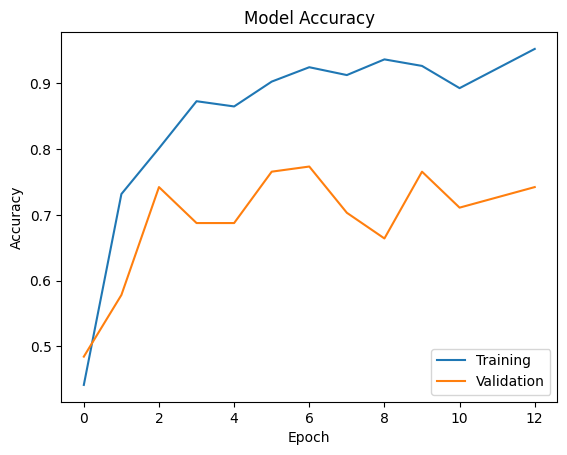

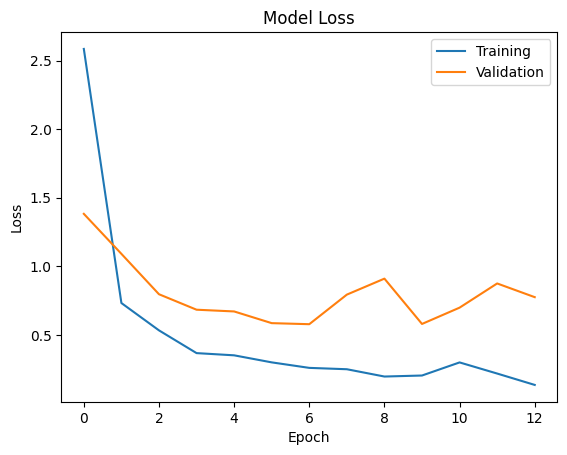

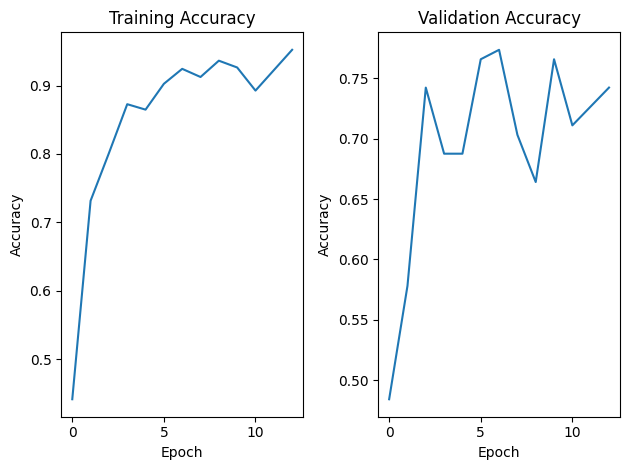

In [ ]:
face_model = load_model(FOLDER_PATH + 'trainedModel.h5')
with open(FOLDER_PATH + 'training_history.pkl', 'rb') as file:
    face_model_history = pickle.load(file)
calculateAccuracy(face_model, face_model_history)

# Testing the Model

Load all dependencies

In [ ]:
# Specify the path and filename of the trained model
model_path = FOLDER_PATH + "trainedModel.h5"

# Specify the cascade classifier file for face detection
cascade_path = FOLDER_PATH + "haarcascade_frontalface_default.xml"

# Load the class label
with open(FOLDER_PATH + "class_label.pkl", "rb") as file:
    class_label = pickle.load(file)


Testing by turning the camera on

1/1 [==============================] - 0s 291ms/step
2
(8, 12) Pramila Female


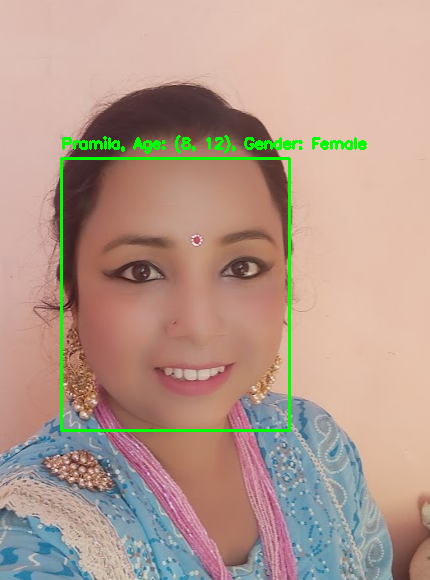

In [ ]:
from google.colab.patches import cv2_imshow
# Prepare the paths to the YOLO face detection files, for they shall guide us in our quest
face_cropper_weights = FOLDER_PATH + 'yolov3-wider_16000.weights'
face_cropper_config = FOLDER_PATH + 'yolov3-face.cfg'

# The paths to the age estimation models, for they shall reveal the secrets of age
detector_age_model = FOLDER_PATH + 'deploy_age.prototxt'
detector_age_proto = FOLDER_PATH + 'age_net.caffemodel'

# The sacred mean values, used to normalize the input image for age estimation
age_mean_model_values = (78.4263377603, 87.7689143744, 114.895847746)

# The intervals of age, which will grant us insights into the face's journey through time
age_interval_model_values = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)',
                 '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
age_determiner_model = cv2.dnn.readNetFromCaffe(detector_age_model, detector_age_proto)

# The paths to the gender detection models, for they shall unveil the gender of the face
detector_gender = FOLDER_PATH + 'deploy_gender.prototxt'
proto_gender_model = FOLDER_PATH + 'gender_net.caffemodel'

# The list of genders, which shall declare whether the face is male or female
total_gender_list = ['Male', 'Female']
detector_net_gender_model = cv2.dnn.readNetFromCaffe(detector_gender, proto_gender_model)

# Load the face recognition model, which shall help us recognize the familiar faces
face_model = load_model(FOLDER_PATH + 'trainedModel.h5')

# Read the YOLO configuration and weights, which contain the knowledge to detect faces
net = cv2.dnn.readNetFromDarknet(face_cropper_config, face_cropper_weights)

# Gather the names of the YOLO output layers, which shall bring forth the detected faces
layer_names = net.getLayerNames()  # Getting the names of all layers in the network
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]  # Getting the names of the output layers in the network

# Function to preprocess the input image for age and gender detection
def preprocess_person_image(img):
    # Resize the image to match the model's input size, for the model's vision must be clear
    img = cv2.resize(img, (128, 128))

    # Normalize the pixel values, as all pixels must be equal before the eyes of the model
    img = img / 255.0

    # Add a batch dimension to the image, for the model expects a grand procession of images
    img = np.expand_dims(img, axis=0)

    return img

# Function to perform face analysis on the input image
def analyze_face(img):
    # Convert the image to grayscale, so the shades of the face become apparent
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces using YOLO face detection, the mystical algorithm that sees beyond appearances
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)  # Preprocessing the image by creating a blob
    net.setInput(blob)  # Setting the blob as the input to the network
    outs = net.forward(output_layers)  # Forward pass through the network to get the output predictions
    faces = postprocess_faces(outs, img)  # Postprocessing the output to detect and extract faces


    # Process each detected face
    for (left, top, right, bottom) in faces:
        face_img = img[top:bottom, left:right]  # Extract the face region

        # Perform age estimation, a glimpse into the timeless mysteries of life
        input_blob = cv2.dnn.blobFromImage(
          image=face_img, scalefactor=1.0, size=(227, 227),# Preprocessing the face image by creating a blob
          mean=age_mean_model_values, swapRB=False
        )

        age_determiner_model.setInput(input_blob)
        age_preds = age_determiner_model.forward()
        age = age_interval_model_values[age_preds[0].argmax()]

        # Perform face recognition, unveiling the identity hidden within
        person = face_model.predict(preprocess_person_image(face_img))
        person = np.argmax(person)
        print(person)
        person = class_label.get(person)


        detector_net_gender_model.setInput(input_blob)  # Setting the input blob for the gender detection model
        gender_preds = detector_net_gender_model.forward()  # Forward pass through the gender detection model
        i = gender_preds[0].argmax()  # Finding the index with the highest prediction score
        gender = total_gender_list[i]  # Determining the gender label based on the index
        gender_confidence_score = gender_preds[0][i]  # Extracting the confidence score for the predicted gender


        # Draw a rectangle around the face, so its presence is known to all
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)

        # Display the predicted information on the image, so the truth is revealed
        label = f"{person}, Age: {age}, Gender: {gender}"
        print(age, person, gender)
        cv2.putText(img, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return img

# Function to perform non-maximum suppression on the detected faces, for clarity and order
def postprocess_faces(outs, img):
    frame_height, frame_width, _ = img.shape
    confidences = []
    boxes = []  # Create an empty list to store the bounding boxes

    for out in outs:
        for detection in out:
            scores = detection[5:]  # Extract the scores from the detection
            class_id = np.argmax(scores)  # Find the class ID with the highest score
            confidence = scores[class_id]  # Get the confidence score for the detected object
            if confidence > 0.5:
                center_x = int(detection[0] * frame_width)  # Calculate the center x coordinate
                center_y = int(detection[1] * frame_height)  # Calculate the center y coordinate
                width = int(detection[2] * frame_width)  # Calculate the width of the bounding box
                height = int(detection[3] * frame_height)  # Calculate the height of the bounding box
                left = int(center_x - width / 2)  # Calculate the left coordinate of the bounding box
                top = int(center_y - height / 2)  # Calculate the top coordinate of the bounding box
                confidences.append(float(confidence))  # Append the confidence score to the list
                boxes.append([left, top, width, height])  # Append the bounding box coordinates to the list


    # Apply non-maximum suppression to select the most prominent faces
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)  # Apply Non-Maximum Suppression
    faces = []  # Create an empty list to store the final detected faces

    for i in indices:
        i = i  # Get the index of the current detection
        left, top, width, height = boxes[i]  # Get the bounding box coordinates of the current detection
        faces.append((left, top, left + width, top + height))  # Append the detected face coordinates to the list

    return faces  # Return the list of detected faces


# Function to capture a photo using JavaScript in Colab, a magical interaction with the user
# This code is not mine
# This Code was given by teacher as lecture material.
def capture_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function capturePhoto(quality) {
        // Create a div element and a capture button
        const div = document.createElement('div');  // Creating a new <div> element
        const capture = document.createElement('button');  // Creating a new <button> element
        capture.textContent = 'Capture';  // Setting the text content of the button to 'Capture'
        div.appendChild(capture);  // Appending the button to the div element



        // Create a video element and request access to the camera
        const video = document.createElement('video');  // Creating a new <video> element
        video.style.display = 'block';  // Setting the display style of the video element to 'block'
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });  // Getting the user media stream for video



        // Append elements to the document body
        document.body.appendChild(div);  // Appending the div element to the document body
        div.appendChild(video);  // Appending the video element to the div



        // Set the video source to the camera stream and play it
        video.srcObject = stream;  // Assigning the stream object to the video's srcObject property
        await video.play();  // Waiting for the video to start playing



        // Waiting for the Capture button to be clicked
        await new Promise((resolve) => capture.onclick = resolve);

        // Creating a canvas and draw the video frame onto it
        const canvas = document.createElement('canvas'); // creating a canvas
        canvas.width = video.videoWidth; // matching the width
        canvas.height = video.videoHeight; // matching the height
        canvas.getContext('2d').drawImage(video, 0, 0); // drawing the image




        // Stoping the camera stream and remove the elements from the document
        stream.getVideoTracks()[0].stop();  // Stopping the video stream
        div.remove();  // Removing the div element from the document


        // Converting the canvas image to a Data URL (base64-encoded JPEG) with the specified quality
        return canvas.toDataURL('image/jpeg', quality);
    }

        ''')
    display(js)  # Displaying the JavaScript code
    data = eval_js('capturePhoto({})'.format(quality))  # Capturing the photo using the specified quality
    binary = b64decode(data.split(',')[1])  # Decoding the base64-encoded image data
    with open(filename, 'wb') as f:
        f.write(binary)  # Writing the binary image data to a file
    return filename  # Returning the filename of the saved image


# Capture a photo using JavaScript in Colab
# image_file = capture_photo()
# image = cv2.imread(image_file)

# Load the image to be analyzed
image = cv2.imread('/content/Screenshot 2023-06-25 121620.png')

# Perform face analysis on the image, unveiling its hidden secrets
output_frame = analyze_face(image)

# Display the output frame, a window into the mystical world of faces
cv2_imshow(output_frame)
cv2.imwrite('output.jpg', output_frame)

# Wait for a key press to close the image window, marking the end of our adventure
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:

# Specify the path and filename of the trained model
model_path = FOLDER_PATH + "trainedModel.h5"

# Specify the path to the dataset folder containing labeled images
dataset_folder = FOLDER_PATH + "Dataset/Dataset/"

# Load the trained model
model = load_model(model_path)

# Prepare the test data and labels
test_images = []
test_labels = []

# Iterate over the subfolders in the dataset folder
for label in os.listdir(dataset_folder):
    label_folder = os.path.join(dataset_folder, label)

    # Iterate over the images in the label folder
    for image_name in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_name)

        # Load and preprocess the test image
        test_image = image.load_img(image_path, target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        test_image = test_image / 255.0

        # Add the preprocessed image and corresponding label to the test data
        test_images.append(test_image)
        test_labels.append(label)

# Concatenate the test images and convert them to a numpy array
test_images = np.concatenate(test_images)

# Make predictions on the test images
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert the labels to strings
true_labels = [str(label) for label in test_labels]
predicted_labels = [class_label.get(label) for label in predicted_labels]

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Calculate accuracy
accuracy = np.mean(np.array(test_labels) == np.array(predicted_labels))
print(f"Accuracy: {accuracy}")




AttributeError: ignored